# Exploring Video Performance of Most Popular Fitness Channels: Exploratory Data Analysis (EDA) Project Using Youtube Video Data 

# 1. Background

## 1.1 Introduction

Youtube has long been the largest streaming video website in the world. Last year 2023, Youtube was the second-most visited website (after Google), with over 2 billion monthly active users.[[1]](#References)

Youtube has changed the way people consume video content, so it's no surprise that it has become a powerful tool for creators and businesses in diverse fields. Although Youtube's recommendation algorithms remain a secret, to help creators understand the performance of their channel and track its key metrics, Youtube Analytics was launched in 2011. However, for viewers, it seems that the factors contributing to a successful video/channel is still a mystery.

As someone who enjoys fitness content on Youtube, I always have questions about what metrics really matter for the success of a video or a channel, and the relationship between video elements (such as number of views, comments, likes, video length, and more). Therefore, I decided to gain some insights on this topic by exploring the statistics of the 7 most successful fitness Youtube channels.

## 1.2 Objectives

The objective of this project is to gain insights into the factors influencing video and channel performances of 7 most popular fitness Youtube channels. Through the use of EDA techniques, such as summary statistics and visualizations, I hope to uncover valuable information about the following:
- Leveraging Youtube API to obtain video data
- Exploring the relationships between video metrics through questions such as:
    - Is there a connection between the engagement metrics (likes and comments) and the overall views a video receives?
    - How important is video length in influencing the view count of a video?
    - Is title length a determining factor in a video's visibility and viewership?
    - How does video posting schedule and frequency affect the viewership of a video?
    - How do videos from the most-subscribed channel perform over time?
- Delving into popular trends/topics in comments and video titles using Natural Language Processing (NLP) techniques (e.g.: WordClouds)

## 1.3 Data Documentation

### Data Selection

I created my own dataset using the Google Youtube Data API version 3.0. The detailed procedure of data creation is presented in [Section 3 - Data Creation with API](#3.-Data-Creation-with-API) below.

The reason for adopting this method is because this project's focus is on analyzing real-world data from popular fitness channels. Hence, it's quite difficult to find an available dataset with the necessary information for the above analysis purposes. Yet, there are also many other Youtube videos/channels datasets on Kaggle if you want to find an alternative option.

### Data Ethics

According to Youtube Data API's guides [[2]](#References), the usage of Youtube API is free of charge given that your application send requests within a quota limit. The default quota allocation for each application is 10,000 units/day, and you could also request additional quota.

Since all data requested from Youtube API is public data (which everyone on the Internet can see on Youtube), there is no particular privacy issues as far as I am concerned. In addition, the data is obtained only for research purposes in this case and not for any commercial interests.

## 1.4 Project Steps

_(Explore sections directly by clicking on their names below)_

- __[Setting Up](#2.-Setting-Up):__ Import libraries
- __[Data Creation with API](#3.-Data-Creation-with-API):__
    - Obtain data via Youtube Data API
    - Create functions for retrieving channel statistics, video statistics and the first 5 comments of each video
- __[Data Pre-Processing](#4.-Data-Pre-Processing):__
    - Video Statistics Dataframe
    - Channel Statistics Dataframe
    - Comments Dataframe
- __[Exploratory Data Analysis (EDA)](#5.-Exploratory-Data-Analysis-(EDA)):__
    - [Number of Subscribers by Channel](#Number-of-Subscribers-by-Channel)
    - [Number of Views by Channel](#Number-of-Views-by-Channel)
    - [Number of Videos by Channel](#Number-of-Videos-by-Channel)
    - [View Count Distribution by Channel](#View-Count-Distribution-by-Channel)
    - [View-Comment and View-Like Relationships](#View-Comment-and-View-Like-Relationships)
    - [Video Length vs View / Like / Comment Counts](#Video-Length-vs-View-/-Like-/-Comment-Counts)
    - [Title Length vs View Count](#Title-Length-vs-View-Count)
    - [Tags Count vs View Count](#Tags-Count-vs-View-Count)
    - [Video Performance Over Time for the Most-Subscribed Channel](#Video-Performance-Over-Time-for-the-Most-Subscribed-Channel)
    - [Video Publishing Schedule vs Views](#Video-Publishing-Schedule-vs-Views)
    - [Video Publishing Frequency](#Video-Publishing-Frequency)
    - [Video Title WordCloud](#Video-Title-WordCloud)
    - [Comments WordCloud](#Comments-WordCloud)
- __[Conclusion](#6.-Conclusion):__
    - Project Limitations
    - Project Extension Ideas

# 2. Setting Up

In [174]:
import pandas as pd
import numpy as np
from dateutil import parser
import isodate
from IPython.display import JSON #better printed results

# Data visualization libraries
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
sns.set(style="darkgrid", color_codes=True)

# Required Google API library
from googleapiclient.discovery import build

In [1]:
# NLP libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')

from wordcloud import WordCloud

# 3. Data Creation with API

First, I created a project in the Google Developers Console, then requested an API key credential. This API key associates API requests with an application to verify data/functionality access and also monitor API activity.

Next, I enabled Youtube API service for the project so I can submit API requests.

I then got the channel IDs of all the channels included in this project (using their URLs).

Thereafter, I created the functions for retrieving channel and video statistics, and the first 5 comments of each video (due to quota limit). There are some videos that we will not be able to get comments because comments are disabled.
- Channel Statitics Dataframe: channel name, total number of subscribers, total view count, total video count, playlist ID
- Video Statistics Dataframe: video ID, channel name, video title, description, tags, publish date & time, view count, like count, favourite count, comment count, video duration, definition, caption
- Comments Dataframe: video ID, comments

In [1]:
# API key credential created on GCP (Google Cloud Platform)
api_key = 'api-key'

In [177]:
# Create an API client
api_service_name = "youtube"
api_version = "v3"

youtube = build(
    api_service_name, api_version, developerKey=api_key)

In [178]:
# Channel ids of all the channels included in this project (using their URLs)
channel_ids = ['UCCgLoMYIyP0U56dEhEL1wXQ', # Chloe Ting
               'UChVRfsT_ASBZk10o0An7Ucg', # Pamela Reif
               'UCIJwWYOfsCfz6PjxbONYXSg', # blogilates
               'UCiP6wD_tYlYLYh3agzbByWQ', # FitnessBlender
               'UCBINFWq52ShSgUFEoynfSwg', # POPSUGAR Fitness
               'UCyqR7WkL8i1b6xtSssDmW9w', # The Fitness Marshall
               'UCERm5yFZ1SptUEU4wZ2vJvw', # Jeremy Ethier
              ]

In [179]:
# Get channel statistics

def get_channel_stats(youtube, channel_ids):

#     Get channel statistics: title, subscriber count, view count, video count, upload playlist

#     Params:
#     youtube: the build object from googleapiclient.discovery
#     channels_ids: list of channel IDs
    
#     Returns:
#     Dataframe containing the channel statistics for all channels in the provided list: title, subscriber count, view count, video count, upload playlist

    
    all_data = []
    
    request = youtube.channels().list(
        part ="snippet,contentDetails,statistics",
        id =','.join(channel_ids) #join ids together using the ,
    )
    response = request.execute()
    
    # Loop through each item in the response & Extract all information & Store in a dictionnary 
    # (eg: 7 channels = 7 dictionnaries)
    for item in response['items']:
        data = {'channelName': item['snippet']['title'],
                'subscribers': item['statistics']['subscriberCount'],
                'views': item['statistics']['viewCount'],
                'totalVideos': item['statistics']['videoCount'],
                'playlistId': item['contentDetails']['relatedPlaylists']['uploads']
        }
        
        # Append all the dictionnaries together to make a dataframe
        all_data.append(data)
        
    return pd.DataFrame(all_data)

In [180]:
channel_stats = get_channel_stats(youtube, channel_ids)

In [181]:
channel_stats.head(2)

# We can find all the channel names, the total subscribers for each channel,
# total views, total number of videos uploaded, and the playlist id (needed to access to all the videos statistics)

,channelName,subscribers,views,totalVideos,playlistId
0,POPSUGAR Fitness,6210000,997638682,1790,UUBINFWq52ShSgUFEoynfSwg
1,Jeremy Ethier,6220000,770984269,263,UUERm5yFZ1SptUEU4wZ2vJvw


In [182]:
# Use the playlist ids to find the video ids and access to all the videos statistics

# Get video IDs
def get_video_ids(youtube, playlist_id):

#     Get list of video IDs of all videos in the given playlist

#     Params:  
#     youtube: the build object from googleapiclient.discovery
#     playlist_id: playlist ID of the channel
    
#     Returns:
#     List of video IDs of all videos in the playlist
    
    
    
    # Create an empty list to store all the video ids
    # Then loop through all the items, append their videoId into the list
    video_ids = []
    
    request = youtube.playlistItems().list(
        part = "snippet,contentDetails",
        playlistId = playlist_id,
        maxResults = 50 #change maxResults to the maximum value (documentation > parameters)
    )
    response = request.execute()
    
    for item in response['items']:
        video_ids.append(item['contentDetails']['videoId'])
    
    # Use next_page_token to get all video ids
    # (since maxResults = [0,50] but the youtube channel has much more videos than that)
    next_page_token = response.get('nextPageToken')
    
    while next_page_token is not None:
        request = youtube.playlistItems().list(
                    part = "snippet,contentDetails",
                    playlistId = playlist_id,
                    maxResults = 50,
                    pageToken = next_page_token)
        response = request.execute()

        for item in response['items']:
            video_ids.append(item['contentDetails']['videoId'])

        next_page_token = response.get('nextPageToken')

    return video_ids

In [183]:
#Get video statistics = Extract video informations based on the list of video ids
def get_video_details(youtube, video_ids):

#     Get video statistics of all videos with given IDs

#     Params:  
#     youtube: the build object from googleapiclient.discovery
#     video_ids: list of video IDs
    
#     Returns:
#     Dataframe with statistics of videos, i.e.:
#         'channelTitle', 'title', 'description', 'tags', 'publishedAt'
#         'viewCount', 'likeCount', 'favoriteCount', 'commentCount'
#         'duration', 'definition', 'caption'

    
    all_video_info = []
    
    for i in range(0, len(video_ids), 50):

        request = youtube.videos().list(
            part ="snippet,contentDetails,statistics",
            #id = video_ids[0:5]
            id =','.join(video_ids[i:i+50])
        )

        response = request.execute()
        

        for video in response['items']:
            stats_to_keep = {'snippet':['channelTitle','title','description','tags','publishedAt'],
                             'statistics':['viewCount','likeCount','favouriteCount','commentCount'],
                             'contentDetails':['duration','definition','caption']
                            }

            video_info = {}
            video_info['video_id'] = video['id']
    
            for k in stats_to_keep.keys():
                for v in stats_to_keep[k]:
                    # For videos with no tags, assign value to None
                    try:
                        video_info[v] = video[k][v]
                    except:
                        video_info[v] = None
    
            all_video_info.append(video_info)
    
    return pd.DataFrame(all_video_info)


In [184]:
# Extract comments from videos
def get_comments_in_videos(youtube, video_ids):

#     Get top level comments as text from all videos with given IDs (only the first 5 comments due to quota limit of Youtube API)

#     Params:   
#     youtube: the build object from googleapiclient.discovery
#     video_ids: list of video IDs
    
#     Returns:
#     Dataframe with video IDs and associated top level comment in text.

    
    all_comments = []
    
    for video_id in video_ids:
        try:   
            request = youtube.commentThreads().list(
                part ="snippet,replies",
                videoId = video_id
            )
            response = request.execute()
        
            comments_in_video = [comment['snippet']['topLevelComment']['snippet']['textOriginal'] for comment in response['items'][0:5]]
            comments_in_video_info = {'video_id': video_id, 'comments': comments_in_video}

            all_comments.append(comments_in_video_info)
            
        except: 
            # When error occurs - most likely because comments are disabled on a video
            print('Could not get comments for video ' + video_id)
        
    return pd.DataFrame(all_comments)


In [185]:
# Create a dataframe with video statistics and comments from all channels

video_df = pd.DataFrame()
comments_df = pd.DataFrame()

for c in channel_stats['channelName'].unique():
    print("Getting video information from channel: " + c)
    playlist_id = channel_stats.loc[channel_stats['channelName'] == c, 'playlistId'].iloc[0]
    video_ids = get_video_ids(youtube, playlist_id)
    
    # Get video data
    video_data = get_video_details(youtube, video_ids)
    # Get comment data
    comments_data = get_comments_in_videos(youtube, video_ids)

    # Append video data together and comment data together
    video_df = video_df.append(video_data, ignore_index = True)
    comments_df = comments_df.append(comments_data, ignore_index = True)
    
# When error occurs ('Could not get comments for video') - most likely because comments are disabled

Getting video information from channel: POPSUGAR Fitness
Could not get comments for video OW5clYKDYMg
Could not get comments for video XNzngttOhBE
Could not get comments for video w66I2ggVJ08
Getting video information from channel: Jeremy Ethier
Getting video information from channel: FitnessBlender
Could not get comments for video SMXMrcz8Grk
Could not get comments for video McD6_oOWs-M
Getting video information from channel: blogilates
Could not get comments for video AiVqvB07GyI
Could not get comments for video nPQHHZ5sjTw
Could not get comments for video X1kMiRQq354
Could not get comments for video k9mZ6zc6wM0
Could not get comments for video o3E9Oak_n7E
Could not get comments for video kCWmpm5nyCo
Could not get comments for video pPHl8qfAo2A
Could not get comments for video Tfei0NvjZrM
Getting video information from channel: Chloe Ting
Could not get comments for video aI5nDsHew_E
Getting video information from channel: The Fitness Marshall
Could not get comments for video dK51gu4k

Now let's take a look at the video statistics, comments, and channel statistics dataframes.

In [186]:
video_df.head(2)

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption
0,UbAnzeE5-Ig,POPSUGAR Fitness,"""Glee""'s Heather Morris Teaches You How to Dan...",Grab a chair and your heels! It's time to join...,"[POPSUGAR Fitness, FitSugarTV, workout class, ...",2024-01-28T14:00:21Z,18054,470,None,22,PT29M10S,hd,false
1,C69w21ywYe8,POPSUGAR Fitness,"Upper-Body Strength Workout | Chest, Back, and...",Powered by strength coach and trainer Nicolett...,"[POPSUGAR Fitness, FitSugarTV, workout class, ...",2024-01-21T14:00:07Z,19488,718,None,29,PT32M37S,hd,false


In [187]:
comments_df.head(2)

,video_id,comments
0,UbAnzeE5-Ig,"[Heather is a good instructor, Heather is an a..."
1,C69w21ywYe8,"[5 am, Kids still sleeping, thank you very muc..."


In [188]:
channel_stats.head(2)

,channelName,subscribers,views,totalVideos,playlistId
0,POPSUGAR Fitness,6210000,997638682,1790,UUBINFWq52ShSgUFEoynfSwg
1,Jeremy Ethier,6220000,770984269,263,UUERm5yFZ1SptUEU4wZ2vJvw


# 4. Data Pre-Processing

## Video Statistics

First, I check if there is any missing value in the video statistics dataframe and find out the source of those missing data. As the result below, there are null values in columns like:
- tags (video has no tags)
- favouriteCount (video has never been added to favourites list)
- commentCount (comments disabled on a video)
- likeCount and viewCount (private video statistics settings - used to hide video statistics)

Then I convert the numerical columns data type from object to numeric.

Next, I check publish time (publishedAt) values to prepare for data augmentation: all are in time zone format. To prepare for later analysis, I create new variables for publish date by day of the week, video duration in seconds, tags count, comment and like ratios (per 1000 views), and video title length.

In [189]:
video_df.head(2)

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption
0,UbAnzeE5-Ig,POPSUGAR Fitness,"""Glee""'s Heather Morris Teaches You How to Dan...",Grab a chair and your heels! It's time to join...,"[POPSUGAR Fitness, FitSugarTV, workout class, ...",2024-01-28T14:00:21Z,18054,470,None,22,PT29M10S,hd,false
1,C69w21ywYe8,POPSUGAR Fitness,"Upper-Body Strength Workout | Chest, Back, and...",Powered by strength coach and trainer Nicolett...,"[POPSUGAR Fitness, FitSugarTV, workout class, ...",2024-01-21T14:00:07Z,19488,718,None,29,PT32M37S,hd,false


In [190]:
video_df.isnull().any()

# There are null values in tags (video no tags), favouriteCount (video not in favourites), 
# commentCount (comments disabled), likeCount or viewCount (private video statistics settings)

video_id          False
channelTitle      False
title             False
description       False
tags               True
publishedAt       False
viewCount          True
likeCount          True
favouriteCount     True
commentCount       True
duration          False
definition        False
caption           False
dtype: bool

In [191]:
video_df.dtypes

# All columns are in object format, so convert some columns (viewCount, likeCount,...) in numerical format

video_id          object
channelTitle      object
title             object
description       object
tags              object
publishedAt       object
viewCount         object
likeCount         object
favouriteCount    object
commentCount      object
duration          object
definition        object
caption           object
dtype: object

In [192]:
numeric_cols = ['viewCount','likeCount','favouriteCount','commentCount']
video_df[numeric_cols] = video_df[numeric_cols].apply(pd.to_numeric, errors = 'coerce', axis = 1)

In [193]:
# Check all dates format in publish date column
video_df.publishedAt.sort_values().value_counts()

# All published dates are in date (time zone) format

2014-10-13T18:53:42Z    7
2014-10-13T18:53:41Z    4
2014-11-18T00:35:54Z    3
2023-01-25T14:00:09Z    2
2023-12-08T20:00:02Z    2
                       ..
2016-07-20T00:30:00Z    1
2016-07-18T19:31:34Z    1
2016-07-18T13:52:03Z    1
2016-07-18T05:50:21Z    1
2024-01-30T15:27:15Z    1
Name: publishedAt, Length: 6058, dtype: int64

In [194]:
# Data augmentation
# Create publish day (of the week) column
video_df['publishedAt'] =  video_df['publishedAt'].apply(lambda x: parser.parse(x)) 
video_df['publishDayName'] = video_df['publishedAt'].apply(lambda x: x.strftime("%A"))


In [195]:
# Convert video duration to seconds
video_df['durationSecs'] = video_df['duration'].apply(lambda x: isodate.parse_duration(x))
video_df['durationSecs'] = video_df['durationSecs'].astype('timedelta64[s]')


In [196]:
video_df[['durationSecs','duration']].head()

,durationSecs,duration
0,1750.0,PT29M10S
1,1957.0,PT32M37S
2,60.0,PT1M
3,1226.0,PT20M26S
4,972.0,PT16M12S


In [197]:
# Add number of tags (tags count)
video_df['tagsCount'] = video_df['tags'].apply(lambda x: 0 if x is None else len(x))
# if else prevents null value of tags column (videos no tag)

In [198]:
# Comments and likes per 1000 views ratio
video_df['likeRatio'] = video_df['likeCount'] / video_df['viewCount'] * 1000
video_df['commentRatio'] = video_df['commentCount'] / video_df['viewCount'] * 1000

In [199]:
# Title character length
video_df['titleLength'] = video_df['title'].apply(lambda x: len(x))

In [200]:
video_df.head(2)

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption,publishDayName,durationSecs,tagsCount,likeRatio,commentRatio,titleLength
0,UbAnzeE5-Ig,POPSUGAR Fitness,"""Glee""'s Heather Morris Teaches You How to Dan...",Grab a chair and your heels! It's time to join...,"[POPSUGAR Fitness, FitSugarTV, workout class, ...",2024-01-28 14:00:21+00:00,18054.0,470.0,NaN,22.0,PT29M10S,hd,false,Sunday,1750.0,12,26.033012,1.218567,57
1,C69w21ywYe8,POPSUGAR Fitness,"Upper-Body Strength Workout | Chest, Back, and...",Powered by strength coach and trainer Nicolett...,"[POPSUGAR Fitness, FitSugarTV, workout class, ...",2024-01-21 14:00:07+00:00,19488.0,718.0,NaN,29.0,PT32M37S,hd,false,Sunday,1957.0,15,36.843186,1.488095,51


## Channel Statistics

For channel statistics and comments dataframes, same as above, I check data type for all columns and perform data type transformation if needed.

In [201]:
channel_stats.head(2)

,channelName,subscribers,views,totalVideos,playlistId
0,POPSUGAR Fitness,6210000,997638682,1790,UUBINFWq52ShSgUFEoynfSwg
1,Jeremy Ethier,6220000,770984269,263,UUERm5yFZ1SptUEU4wZ2vJvw


In [202]:
channel_stats.dtypes

channelName    object
subscribers    object
views          object
totalVideos    object
playlistId     object
dtype: object

In [203]:
# Convert numerical columns
numeric_cols = ['subscribers', 'views', 'totalVideos']
channel_stats[numeric_cols] = channel_stats[numeric_cols].apply(pd.to_numeric, errors='coerce')

## Comments

In [204]:
comments_df.head(2)

,video_id,comments
0,UbAnzeE5-Ig,"[Heather is a good instructor, Heather is an a..."
1,C69w21ywYe8,"[5 am, Kids still sleeping, thank you very muc..."


In [205]:
comments_df.dtypes

video_id    object
comments    object
dtype: object

# 5. Exploratory Data Analysis (EDA)

To begin with, let's look at the bar plots below showing the ranks of all channels in terms of subscriber, view, and video counts respectively.

## Number of Subscribers by Channel

[Back to Top](#1.4-Project-Steps)

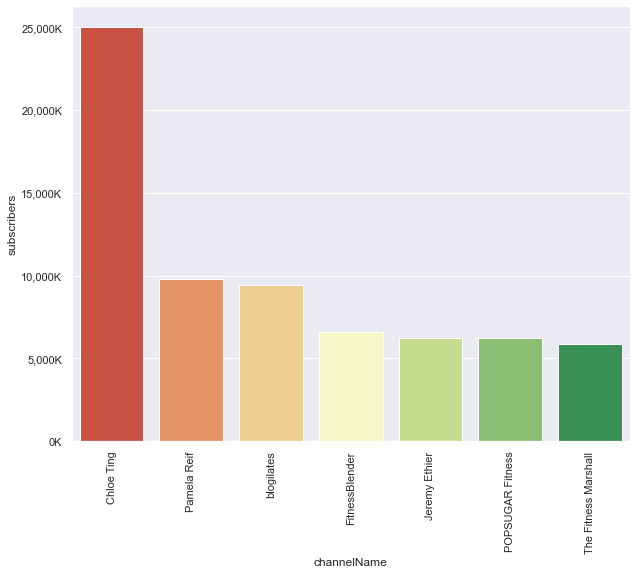

In [206]:
plt.figure(figsize = (10,8))

ax = sns.barplot(x ='channelName', y ='subscribers', data = channel_stats.sort_values('subscribers', ascending = False), palette = 'RdYlGn')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))
plot = ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

## Number of Views by Channel

[Back to Top](#1.4-Project-Steps)

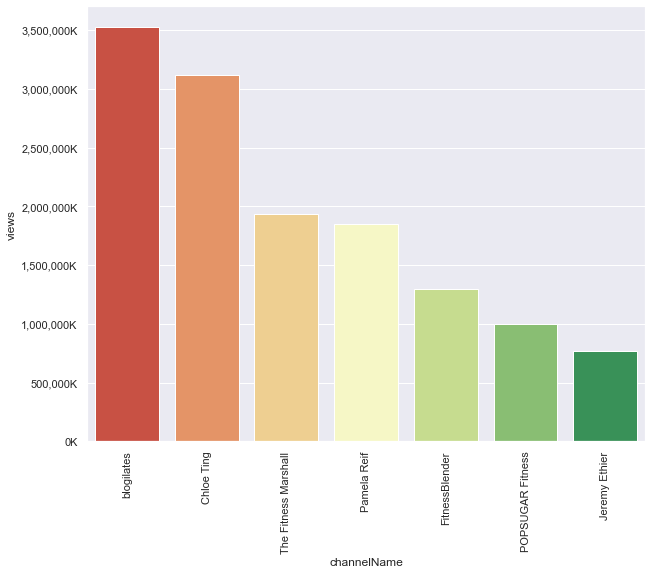

In [207]:
plt.figure(figsize = (10,8))

ax = sns.barplot(x = 'channelName', y = 'views', data = channel_stats.sort_values('views', ascending=False), palette = 'RdYlGn')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))
plot = ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

## Number of Videos by Channel

[Back to Top](#1.4-Project-Steps)

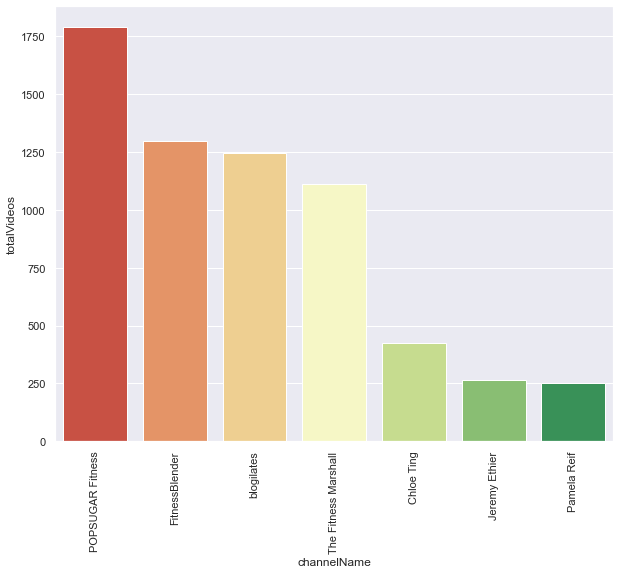

In [208]:
plt.figure(figsize = (10,8))

ax = sns.barplot(x = 'channelName', y = 'totalVideos', data = channel_stats.sort_values('totalVideos', ascending = False), palette = 'RdYlGn')
plot = ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

We can see from these 3 charts that the rankings for number of subscribers, views, and videos vary a lot between these fitness channels.

- Chloe Ting channel has the most subscribers (far more than other channels in the list), but does not have the most views, possibly because it has relatively fewer videos.

- Interestingly, blogilates channel has almost as many videos as Finess Blender channel, but has much more views (3,500,000K vs. under 1,500,000K).

- Although POPSUGAR Fitness channel has the most videos and 7 times more than Jeremy Ethier channel, these 2 channels have nearly the same number of subscribers.

- Although The Fitness Marshall does not have too many subscribers (the least among these channels) (but still a lot - over 5 million), it has a fairly high total number of views. This may be due to the channel's large number of videos.

## View Count Distribution by Channel

[Back to Top](#1.4-Project-Steps)

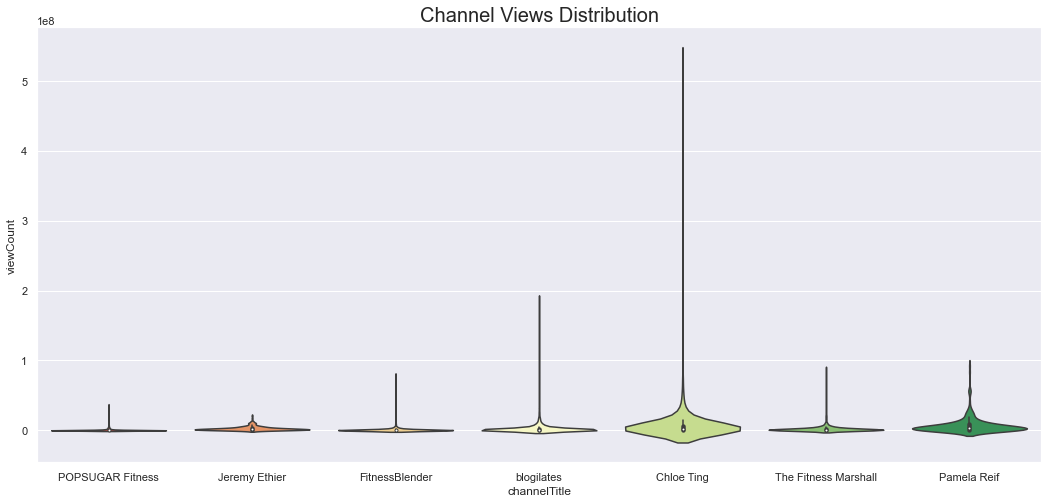

In [209]:
plt.rcParams['figure.figsize'] = (18, 8)

sns.violinplot(data = video_df, x = 'channelTitle', y = 'viewCount', scale = 'width', palette = 'RdYlGn')
plt.title('Channel Views Distribution', fontsize = 20)
plt.show()

Now we can see how the views are distributed by channel (viewCount in hundreds of millions).

Most channels have all videos under 100 million views, except blogilates and Chloe Ting.

As shown in the bar charts above, Chloe Ting does not have too many videos but has a much higher total views than other channels. It turns out that her channel's views distribution has many outliers (which means Chloe Ting has many viral videos with particular high numbers of views). She even has a video with over 500 million views (wow!).

Although blogilates and Jeremy Ethier have the majority of videos with the same number of views (median, min, and max of the 2 violin plots are almost similar), there is a big difference between the total views of these 2 channels (most-viewed vs least-viewed channel). This can be explained by the higher number of videos that blogilates channel has, combining with its many viral videos.


## View-Comment and View-Like Relationships

[Back to Top](#1.4-Project-Steps)

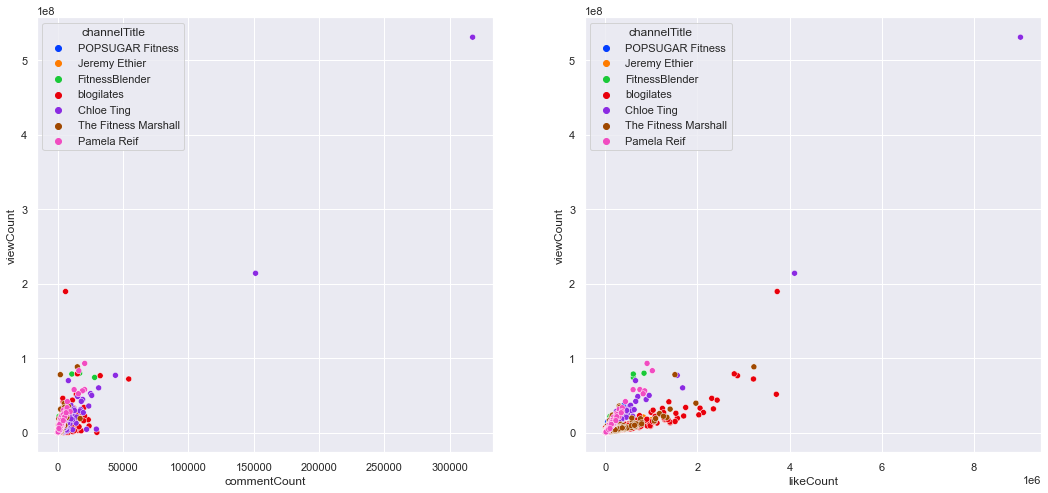

In [210]:
fig, ax =plt.subplots(1,2)
sns.scatterplot(data = video_df, x = "commentCount", y = "viewCount", ax=ax[0], hue ='channelTitle', palette = 'bright')
sns.scatterplot(data = video_df, x = "likeCount", y = "viewCount", ax=ax[1], hue ='channelTitle', palette = 'bright')
plt.show()

The first thing we can notice is the 2 extremely high outliers (purple) from Chloe Ting channel (the 2 viral videos with respectively over 500 and 200 million views). These points stand out greatly from the overall pattern of values in these plots.

Now we will observe the plots when removing these outliers.

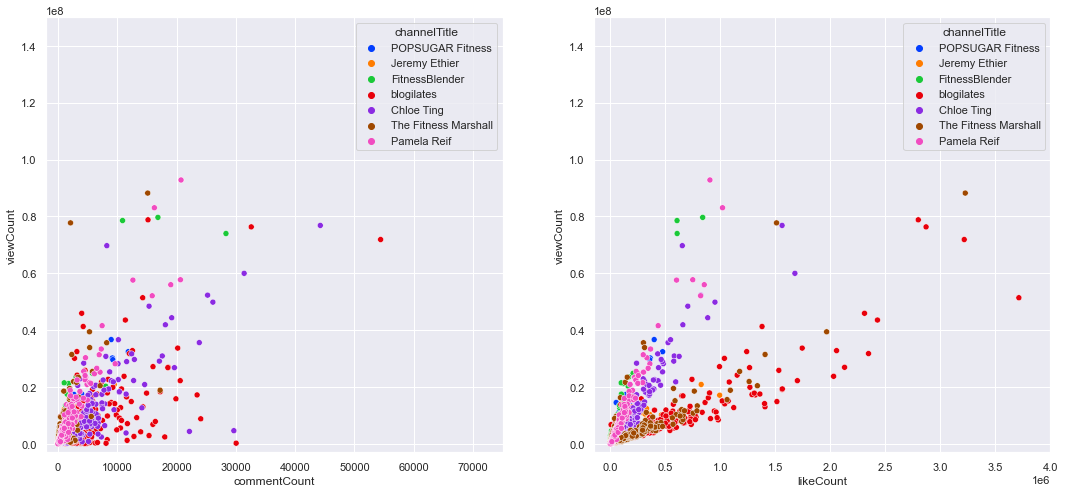

In [211]:
fig, ax =plt.subplots(1,2)
sns.scatterplot(data = video_df, x = "commentCount", y = "viewCount", ax=ax[0], hue = 'channelTitle', palette = 'bright').set(xlim=(-2000,75000), ylim=(-0.3e7,15e7))
sns.scatterplot(data = video_df, x = "likeCount", y = "viewCount", ax=ax[1], hue = 'channelTitle', palette = 'bright').set(xlim=(-0.15e6,4e6), ylim=(-0.3e7, 15e7))
plt.show()

After removing these 2 outliers, the correlation between views and comments is clearer than between views and likes. 

We can see in the view-like plot, there are some videos (mostly from blogilates channel) with a lot of likes but the numbers of views are not correspondingly high.

Now we can take a look at the correlations between comment/like ratios and views (instead of the absolute numbers) (2 outliers included).

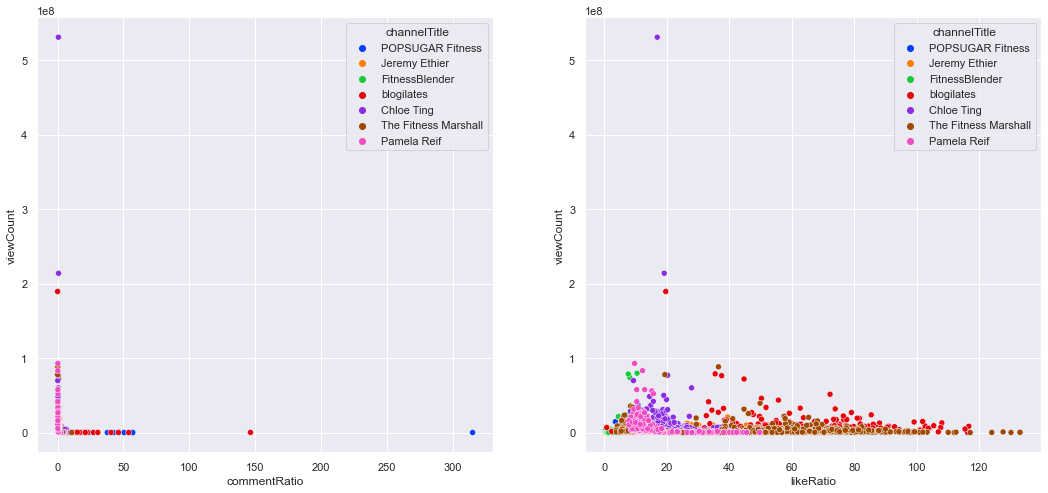

In [212]:
fig, ax =plt.subplots(1,2)
sns.scatterplot(data = video_df, x = "commentRatio", y = "viewCount", ax=ax[0], hue = 'channelTitle', palette = 'bright')
sns.scatterplot(data = video_df, x = "likeRatio", y = "viewCount", ax=ax[1], hue = 'channelTitle', palette = 'bright')
plt.show()

When changing to comment and like ratio, the view-comment relationship seems to completely disappear. This is understandable since comments require more time and effort from viewers, and comments can also be deleted on old videos.

On the other hand, although it is more subtle, we can still see a positive correlation between likes and views.

## Video Length vs View / Like / Comment Counts

[Back to Top](#1.4-Project-Steps)

First, let's take a look at the video length distribution.

<AxesSubplot:xlabel='durationSecs', ylabel='Count'>

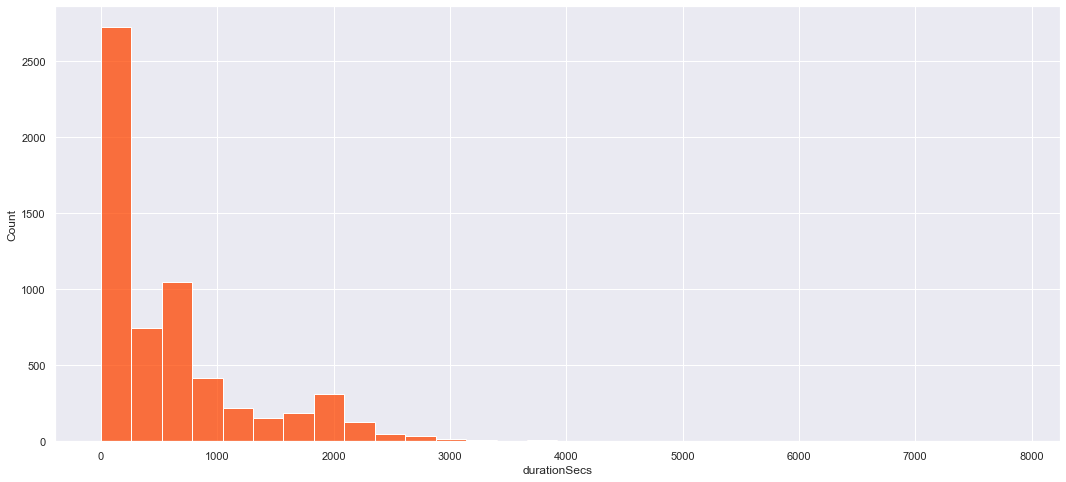

In [213]:
sns.histplot(data = video_df, x = "durationSecs", bins = 30, color = 'orangered')

The number of short videos (about under 250 seconds = 4 minutes) is much higher. This makes sense, given the current trend of short-form content and the popularity of youtube shorts in recent years.

We can also see some quite long videos (about 3000 seconds = 50 minutes), which can be streaming videos or long workout tutorials.

Now let's look at the correlation between video duration and number of views/comments/likes.

<AxesSubplot:xlabel='durationSecs', ylabel='likeCount'>

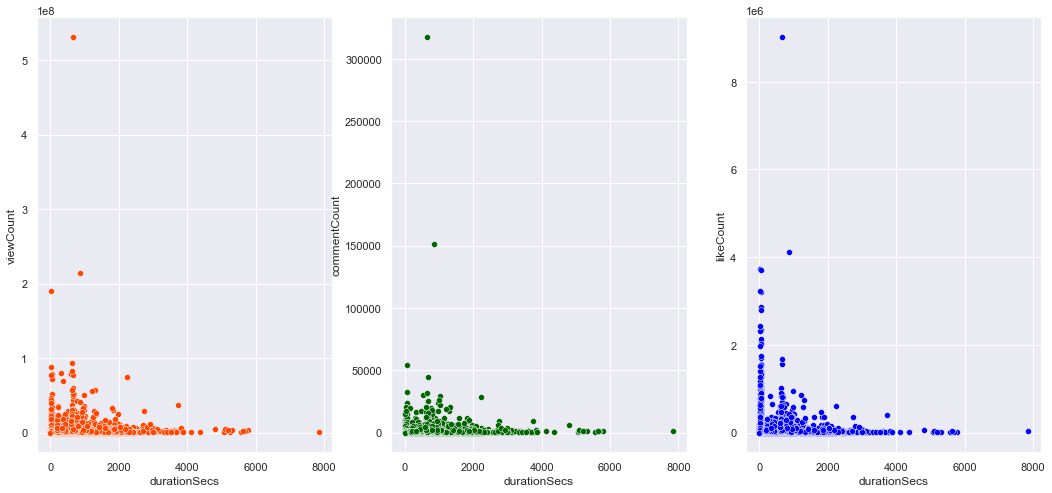

In [214]:
fig, ax =plt.subplots(1,3)
sns.scatterplot(data = video_df, x = "durationSecs", y = "viewCount", ax=ax[0], color = 'orangered')
sns.scatterplot(data = video_df, x = "durationSecs", y = "commentCount", ax=ax[1], color = 'darkgreen')
sns.scatterplot(data = video_df, x = "durationSecs", y = "likeCount", ax=ax[2], color = 'blue')

As seen in the 3 plots above, shorter videos tend to get more views, likes, and comments.

## Title Length vs View Count

[Back to Top](#1.4-Project-Steps)

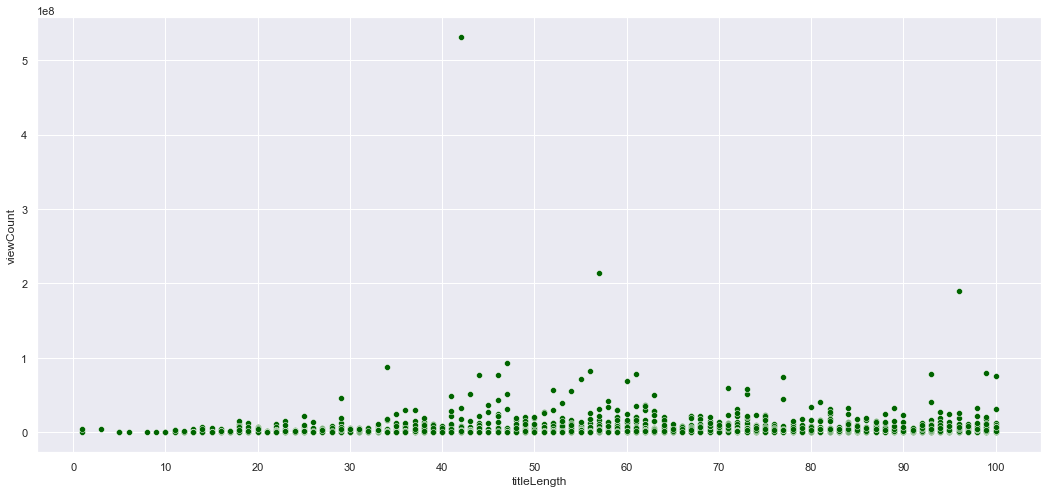

In [215]:
sns.scatterplot(data = video_df, x = "titleLength", y = "viewCount", color = 'darkgreen')
plt.xticks(range(0,110,10))
plt.show()

As shown on this plot, there seems to be no obvious association between video title length and view count.

There are very few video titles under 15 characters and those videos don't have many views.

## Tags Count vs View Count

[Back to Top](#1.4-Project-Steps)

<AxesSubplot:xlabel='tagsCount', ylabel='viewCount'>

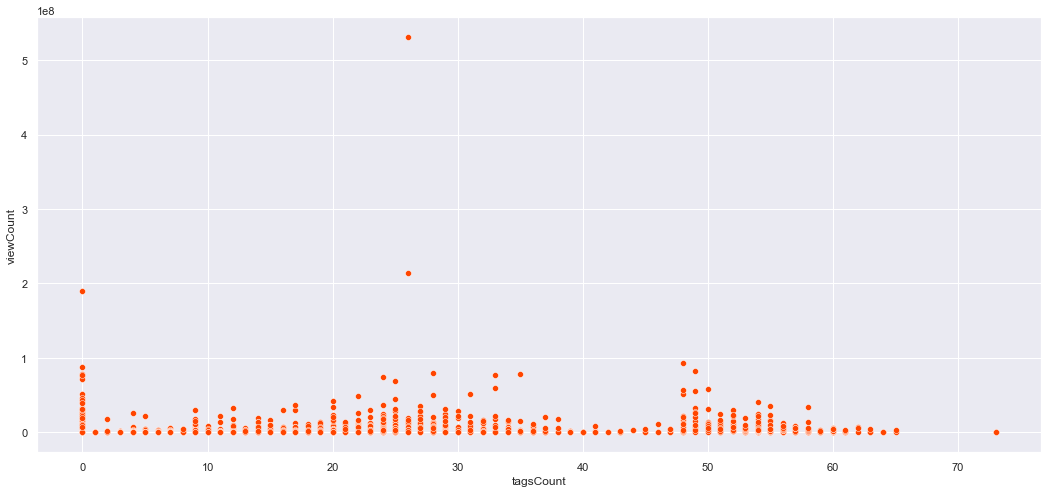

In [216]:
sns.scatterplot(data = video_df, x = "tagsCount", y = "viewCount", color = 'orangered')

There appears to be no direct connection between tags count and viewership. There are videos without tags that still have many views

## Video Performance Over Time for the Most-Subscribed Channel

[Back to Top](#1.4-Project-Steps)

Now let's analyze view, like, and comment counts over time for the most-subscribed channel Chloe Ting.

<AxesSubplot:xlabel='publishedAt', ylabel='commentCount'>

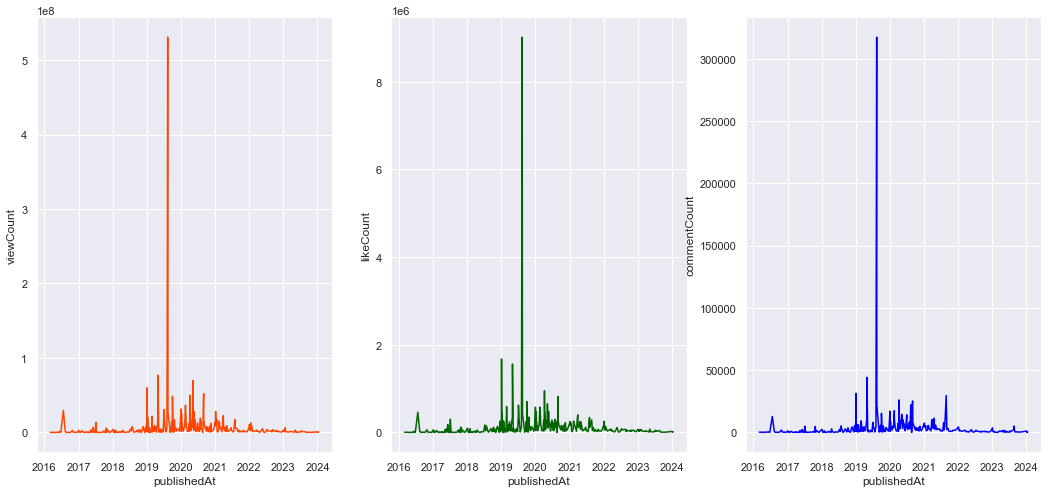

In [217]:
fig, ax =plt.subplots(1,3)
sns.lineplot(data = video_df[video_df['channelTitle'] == 'Chloe Ting'], x='publishedAt', y='viewCount', ax=ax[0], color = 'orangered')
sns.lineplot(data = video_df[video_df['channelTitle'] == 'Chloe Ting'], x='publishedAt', y='likeCount', ax=ax[1], color = 'darkgreen')
sns.lineplot(data = video_df[video_df['channelTitle'] == 'Chloe Ting'], x='publishedAt', y='commentCount', ax=ax[2], color = 'blue')


As we can see, Chloe Ting channel has the most-viewed videos from the beginning of 2019 to the second half of 2020. It is likely that during the social distancing period, people paid more attention to their health and spent more time exercising at home.

These videos also receive corresponding viewer engagement, shown by the like and comment distributions being almost identical to the view distribution over time.

This showns that for this channel, the correlation between view, like, and comment is quite clear, meaning the more views a video has, the more likes and comments it will receive. This seems to reinforce the concept of social proof, which means that people tend to like better the products that are already liked by many other people.

## Video Publishing Schedule vs Views

[Back to Top](#1.4-Project-Steps)

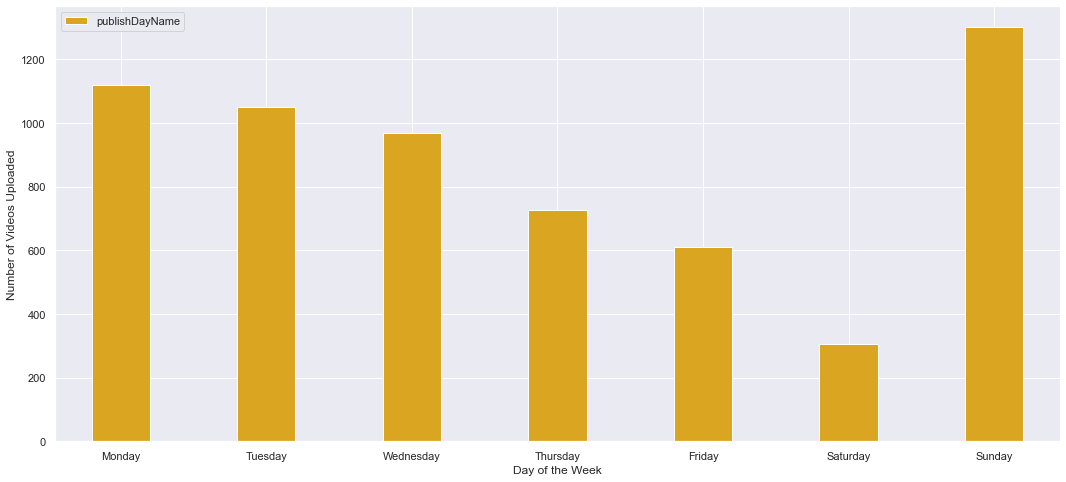

In [218]:
# Number of Videos Uploaded by Day of the Week
day_df = pd.DataFrame(video_df['publishDayName'].value_counts())
weekdays = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_df = day_df.reindex(weekdays)
ax = day_df.reset_index().plot.bar(x='index', y='publishDayName', color='goldenrod', ylabel='Number of Videos Uploaded', xlabel='Day of the Week',width=0.4,rot=0)


Interestingly, the day with the most videos uploaded is Sunday, and the other weekend day, Saturday, has the fewest videos uploaded.

<AxesSubplot:xlabel='Day of the Week', ylabel='View Count'>

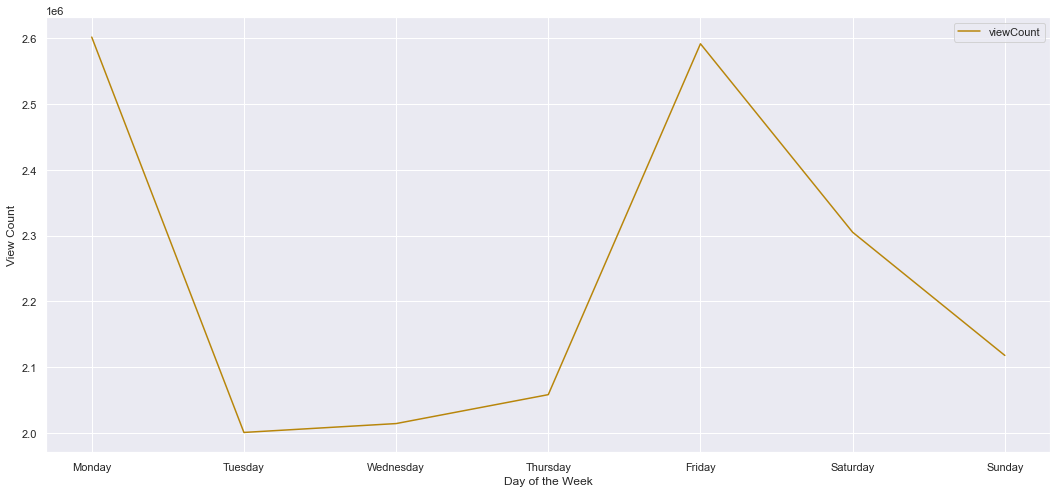

In [219]:
# Average View Count by Publish Day of the Week
custom_dict = {'Monday':0, 'Tuesday':1, 'Wednesday':2, 'Thursday':3, 'Friday':4, 'Saturday':5, 'Sunday':6}
pd.DataFrame(video_df.groupby('publishDayName')['viewCount'].mean()).sort_values(by = ['publishDayName'], key=lambda x: x.map(custom_dict)).plot(xlabel='Day of the Week', ylabel='View Count', color='darkgoldenrod')


The number of views of videos posted on Friday is quite high, but gradually drops over the weekend and then rebounds to its highest point on Monday, while Tuesday and Wednesday have a low view count.

<AxesSubplot:xlabel='Video Publish Time', ylabel='Number of Videos Uploaded'>

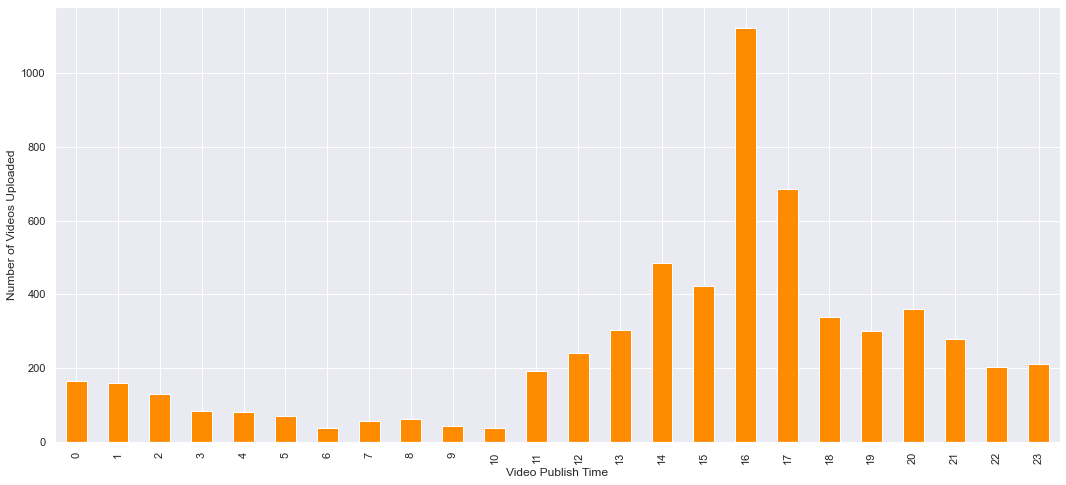

In [221]:
# Number of Videos Uploaded by Publish Time
video_df['publishedAt'].dt.hour.value_counts().sort_index().plot.bar(color='darkorange', xlabel='Video Publish Time', ylabel='Number of Videos Uploaded')


The most popular timeframe for posting videos is around 4-5 PM.This could be because that's when many people have just finished work and are getting ready for their afternoon workouts.

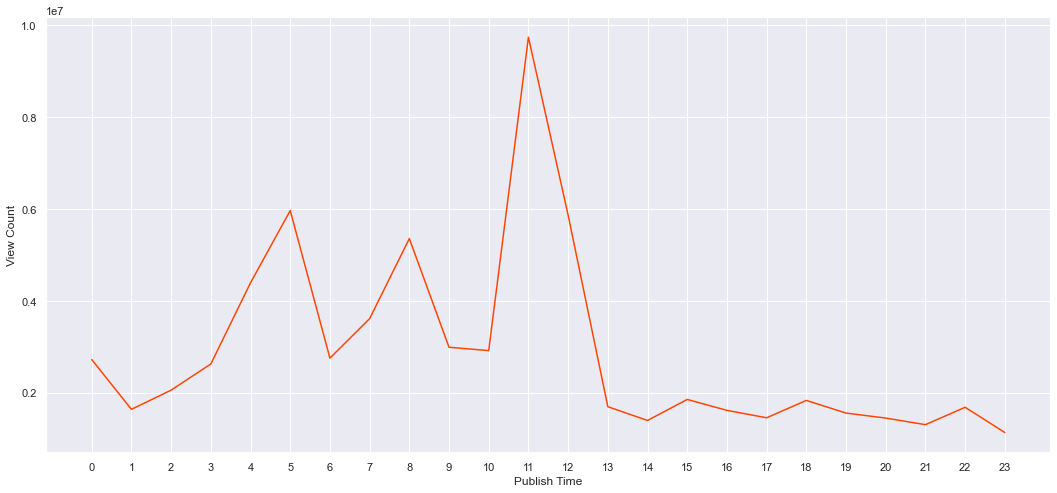

In [222]:
# Average View Count by Publish Time
video_df.groupby(video_df['publishedAt'].dt.hour)['viewCount'].mean().plot(xlabel='Publish Time', ylabel='View Count', color='orangered')
plt.xticks(range(0,24))
plt.show()

Although the most videos are uploaded around 4-5pm, the number of views for those videos is not too high. 

Videos uploaded around 11am-12pm have the most views. That might be because these videos were posted during lunch break, so subscribers could immediately click to watch the videos when they received the notification. And once these videos achieve high watch time, Youtube shares/recommends them to other people. Usually that's a few hours later, so it falls in the evening when people have finished work and might want to exercise.


## Video Publishing Frequency

[Back to Top](#1.4-Project-Steps)

In [223]:
# Average Time Difference between publish days by channel
video_df['timeDiff'] = video_df.sort_values('publishedAt', ascending=False).groupby('channelTitle')['publishedAt'].diff().apply(lambda x: abs(x.days)).fillna(0)
video_df.groupby(['channelTitle'])['timeDiff'].mean().sort_values()


channelTitle
POPSUGAR Fitness         3.186034
FitnessBlender           4.418981
blogilates               4.705551
The Fitness Marshall     4.799001
Chloe Ting               7.227166
Jeremy Ethier           10.604563
Pamela Reif             11.550781
Name: timeDiff, dtype: float64

What's surprising is that even though the channels' starting times are different, the video upload frequency matches perfectly with the video count ranking (POPSUGAR Fitness has the most videos and Pamela Reif has the least).

## Video Title WordCloud

[Back to Top](#1.4-Project-Steps)

In [224]:
stop_words = set(stopwords.words('english'))
video_df['title_no_stopwords'] = video_df['title'].apply(lambda x: [item for item in str(x).split() if item not in stop_words])

all_words = list([a for b in video_df['title_no_stopwords'].tolist() for a in b])
all_words_str = ' '.join(all_words) 

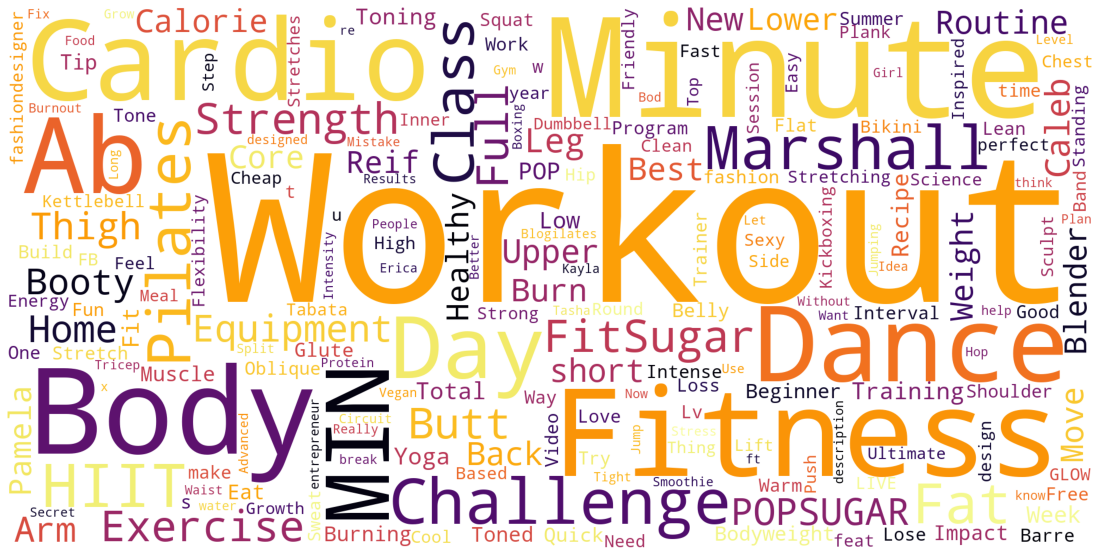

In [225]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(20, 10))
    plt.imshow(wordcloud) 
    plt.axis("off");

wordcloud = WordCloud(width = 2000, height = 1000, random_state=1, background_color='white', 
                      colormap='inferno', collocations=False).generate(all_words_str)
plot_cloud(wordcloud)


Besides some channel names, the most common words we can see are Workout, Fitness, Body, Cardio, Dance, Minute, Challenge, which can be expected from fitness channels.

## Comments WordCloud

[Back to Top](#1.4-Project-Steps)

In [226]:
stop_words = set(stopwords.words('english'))
comments_df['comments_no_stopwords'] = comments_df['comments'].apply(lambda x: [item for item in str(x).split() if item not in stop_words])

all_words = list([a for b in comments_df['comments_no_stopwords'].tolist() for a in b])
all_words_str = ' '.join(all_words) 

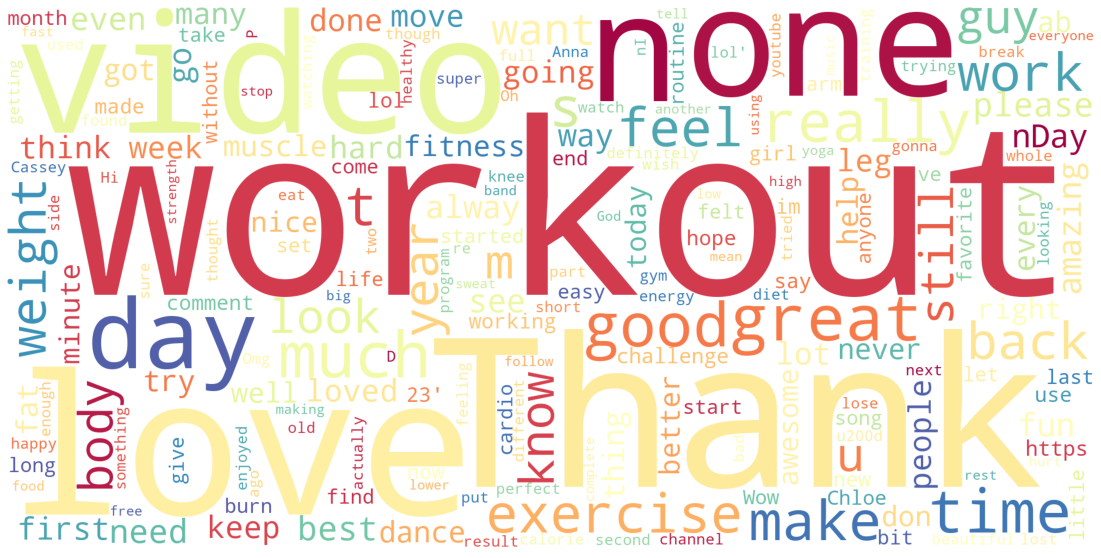

In [227]:
wordcloud = WordCloud(width = 2000, height = 1000, random_state=1, background_color='white', 
                      colormap='Spectral', collocations=False).generate(all_words_str)
plot_cloud(wordcloud)

Besides the most common words such as "workout" and "video", there are many very positive frequent words in comments like "thank", "love", "great", "good", etc.

**********

# 6. Conclusion

Through the exploration of 7 most popular fitness channels data in this project, we have gathered some interesting insights:

- A video with many likes is likely to get more views and vice versa. But having more views does not guarantee more comments.

- Short-form videos are not only more popular but also often receive more views, likes and comments.

- There is no apparent correlation between video title length and views. However, videos with short title under 15 characters don't have many views.

- Videos posted around 11am - 12pm get the most views and from 1pm, the number of views is quite low. Publish days of the week with most views are Friday and Monday.

Despite bringing interesting discoveries, the metrics considered within this project are just the tip of the iceberg among countless other analytics on channel performance and video success.

### Project Limitations

With Youtube Data API quota limit of 10,000 units/day and with a huge number of channels in the fitness category, the project has the following limitations:
- The selected channels are the most subscribed ones that I know at the time of project implementation. There are many other successful fitness channels based on many different evaluation criterias, such as content significance, total views, video quality, viewer engagement, etc.
- Because the number of channels (7) and comments per video (5) is limited, the data in this project is just a sample and may not represent all channels/videos of the same genre.

As mentioned above, there are many other metrics and other factors influencing video and channel performance, from internal factors such as audience demographics (age, genre, location, language), audience size, topic interest, to external factors like video promotion, thumbnail.

### Project Extension Ideas

Potential ideas that can be considered to expand this project:
- Extend this research to other genres or to more channels of the same fitness genre.
- Apply other NLP techniques to analyze comments (for example: sentiment analysis), thereby understanding viewer feedbacks and needs.

### References

[[1]](#1.1-Introduction) List of most-visited websites in 2023. https://en.wikipedia.org/wiki/List_of_most-visited_websites

[[2]](#Data-Ethics) Youtube Data API Documentation. https://developers.google.com/youtube/v3/getting-started